In [1]:
import pandas as pd
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
%matplotlib inline
import matplotlib as mpl

# open zipped dataset
with zipfile.ZipFile("PregnancyData.zip") as z:
   # open the csv file in the dataset
   with z.open("PregnancyData.csv") as f:
     # read the dataset
      df = pd.read_csv(f)

C:\Users\dauga\AppData\Local\Temp\ipykernel_20292\3340992046.py:15: DtypeWarning: Columns (6,7,29,31,32,43,48,50,51,52,53,54,77,83,89,90,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


In [2]:
df.columns[df.isnull().any()]

Index(['Date patient started trying to become pregnant OR date of last pregnancy',
       'Main Reason for Producing Embroys Storing Eggs',
       'Type of Ovulation Induction', 'Egg Donor Age at Registration',
       'Sperm Donor Age at Registration', 'Donated embryo',
       'Patient acting as Surrogate', 'PGD', 'PGD treatment', 'PGS',
       'PGS Treatment', 'Elective Single Embryo Transfer', 'Egg Source',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Date of Egg Collection', 'Date of Egg Thawing', 'Date of Egg Mixing',


<AxesSubplot: >

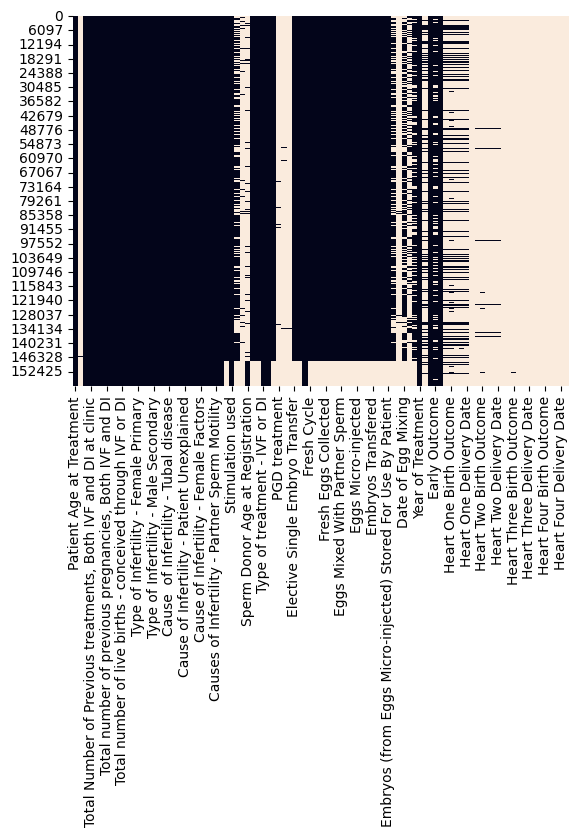

In [3]:
#Heatmap of missing data
sns.heatmap(df.isnull(), cbar=False)

In [4]:
# Getting the list of columns
col = df.columns
  
# Printing Number of columns
print('Original number of columns :', len(col))

# Delete columns containing either 6% or more than 6% NaN Values
perc = 6.0
min_count = int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_count)
col_mod = mod_df.columns

# Adding new Embryos Transfered column to mod_df from df
mod_df['Embryos Transfered'] = df['Embryos Transfered']

print('New number of columns :', len(col_mod))
print(mod_df.columns)

Original number of columns : 95
New number of columns : 35
Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infer

C:\Users\dauga\AppData\Local\Temp\ipykernel_20292\4135250222.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['Embryos Transfered'] = df['Embryos Transfered']


In [5]:
# obtaining the shape and size of mod_df after removing and adding columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (158519, 36)


Index(['Patient Age at Treatment',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility 

In [6]:
# Dropping more columns
mod_df.drop('Total Number of Previous cycles, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total Number of Previous treatments, Both IVF and DI at clinic', axis=1, inplace = True)
mod_df.drop('Total Number of Previous DI cycles', axis=1, inplace = True)
mod_df.drop('Total number of previous pregnancies, Both IVF and DI', axis=1, inplace = True)
mod_df.drop('Total number of DI pregnancies', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through IVF or DI', axis=1, inplace = True)
mod_df.drop('Total number of live births - conceived through DI', axis=1, inplace = True)
mod_df.drop('Type of treatment - IVF or DI', axis=1, inplace = True)
mod_df.drop('Year of Treatment', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Partner Sperm Concentration', axis=1, inplace = True)
mod_df.drop('Cause of Infertility - Female Factors', axis=1, inplace = True)
mod_df.drop('Causes of Infertility - Partner Sperm Motility', axis=1, inplace = True)
mod_df.drop('Cause of Infertility -  Partner Sperm Immunological factors', axis=1, inplace = True)
mod_df.drop('Specific treatment type', axis=1, inplace = True)

# obtaining the shape and size of mod_df after removing more columns 
print("shape of dataframe", mod_df.shape)
mod_df.columns

C:\Users\dauga\AppData\Local\Temp\ipykernel_20292\1257923371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df.drop('Total Number of Previous cycles, Both IVF and DI', axis=1, inplace = True)
C:\Users\dauga\AppData\Local\Temp\ipykernel_20292\1257923371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df.drop('Total Number of Previous treatments, Both IVF and DI at clinic', axis=1, inplace = True)
C:\Users\dauga\AppData\Local\Temp\ipykernel_20292\1257923371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

shape of dataframe (158519, 22)


C:\Users\dauga\AppData\Local\Temp\ipykernel_20292\1257923371.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df.drop('Specific treatment type', axis=1, inplace = True)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

In [7]:
print(mod_df.nunique())

Patient Age at Treatment                                7
Total Number of Previous IVF cycles                     7
Total number of IVF pregnancies                        12
Total number of live births - conceived through IVF     6
Type of Infertility - Female Primary                    2
Type of Infertility - Female Secondary                  2
Type of Infertility - Male Primary                      2
Type of Infertility - Male Secondary                    2
Type of Infertility -Couple Primary                     2
Type of Infertility -Couple Secondary                   2
Cause  of Infertility - Tubal disease                   2
Cause of Infertility - Ovulatory Disorder               2
Cause of Infertility - Male Factor                      2
Cause of Infertility - Patient Unexplained              2
Cause of Infertility - Endometriosis                    2
Cause of Infertility - Cervical factors                 2
Cause of Infertility -  Partner Sperm Morphology        2
Stimulation us

In [8]:
# Show each unique value in every column
for col in mod_df:
    print(col)
    print(mod_df[col].unique())

Patient Age at Treatment
['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999']
Total Number of Previous IVF cycles
['2' '3' '0' '5' '4' '1' '>=5']
Total number of IVF pregnancies
[0 1 2 4 3 5 '0' '1' '2' '3' '4' '>=5']
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
['Partner' 'Donor' 'not assigned' 'Partner & Donor']
Number of Live Births
[1 0 2 3 4]
Number

In [9]:
# Fixing outliers and errors in data
mod_df.drop(mod_df.index[mod_df['Patient Age at Treatment'] == '999'], inplace = True)
mod_df.drop(mod_df.index[mod_df['Number of foetal sacs with fetal pulsation'] == 40], inplace = True)
mod_df.drop(mod_df.index[mod_df['Sperm From'] == 'not assigned'], inplace = True)
mod_df['Patient Age at Treatment'].replace({'40-42': 41, '45-50': 47.5, '35-37': 36, '18 - 34': 26, '43-44': 43.5, '38-39': 38.5}, inplace=True)
mod_df['Total Number of Previous IVF cycles'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Total number of IVF pregnancies'].replace({'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '>=5': 6}, inplace=True)
mod_df['Sperm From'].replace({'Partner': 0, 'Donor': 1, 'Partner & Donor': 2}, inplace=True)
mod_df['Patient Age at Treatment'].replace({'40-42': 0, '45-50': 1, '35-37': 2, '18 - 34': 3, '43-44': 4, '38-39': 5}, inplace=True)
# mod_df['Total number of live births - conceived through IVF'].replace({2: 1, 3: 1, 4: 1, 5: 1}, inplace=True)
mod_df.fillna(value=mod_df['Embryos Transfered'].mean().astype(int), inplace=True)

C:\Users\dauga\AppData\Local\Temp\ipykernel_20292\3861527331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df.drop(mod_df.index[mod_df['Patient Age at Treatment'] == '999'], inplace = True)
C:\Users\dauga\AppData\Local\Temp\ipykernel_20292\3861527331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df.drop(mod_df.index[mod_df['Number of foetal sacs with fetal pulsation'] == 40], inplace = True)
C:\Users\dauga\AppData\Local\Temp\ipykernel_20292\3861527331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

In [10]:
# Checking each unique value in every column
for col_up in mod_df:
    print(col_up)
    print(mod_df[col_up].unique())

Patient Age at Treatment
[41.  47.5 36.  26.  43.5 38.5]
Total Number of Previous IVF cycles
[2 3 0 5 4 1 6]
Total number of IVF pregnancies
[0 1 2 4 3 5 6]
Total number of live births - conceived through IVF
[0 1 2 3 5 4]
Type of Infertility - Female Primary
[0 1]
Type of Infertility - Female Secondary
[0 1]
Type of Infertility - Male Primary
[0 1]
Type of Infertility - Male Secondary
[0 1]
Type of Infertility -Couple Primary
[0 1]
Type of Infertility -Couple Secondary
[0 1]
Cause  of Infertility - Tubal disease
[0 1]
Cause of Infertility - Ovulatory Disorder
[0 1]
Cause of Infertility - Male Factor
[0 1]
Cause of Infertility - Patient Unexplained
[1 0]
Cause of Infertility - Endometriosis
[0 1]
Cause of Infertility - Cervical factors
[0 1]
Cause of Infertility -  Partner Sperm Morphology
[0 1]
Stimulation used
[0 1]
Sperm From
[0 1 2]
Number of Live Births
[1 0 2 3 4]
Number of foetal sacs with fetal pulsation
[1 0 2 3 4]
Embryos Transfered
[1. 2. 0. 3.]


In [11]:
# obtaining the shape and size of mod_df after fixing outliers and errors in data
print("shape of dataframe", mod_df.shape)
mod_df.columns

shape of dataframe (156025, 22)


Index(['Patient Age at Treatment', 'Total Number of Previous IVF cycles',
       'Total number of IVF pregnancies',
       'Total number of live births - conceived through IVF',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used',
       'Sperm From', 'Number of Live Births',
       'Number of foetal sacs with fetal pulsation', 'Embryos Transfered'],
      dtype='object')

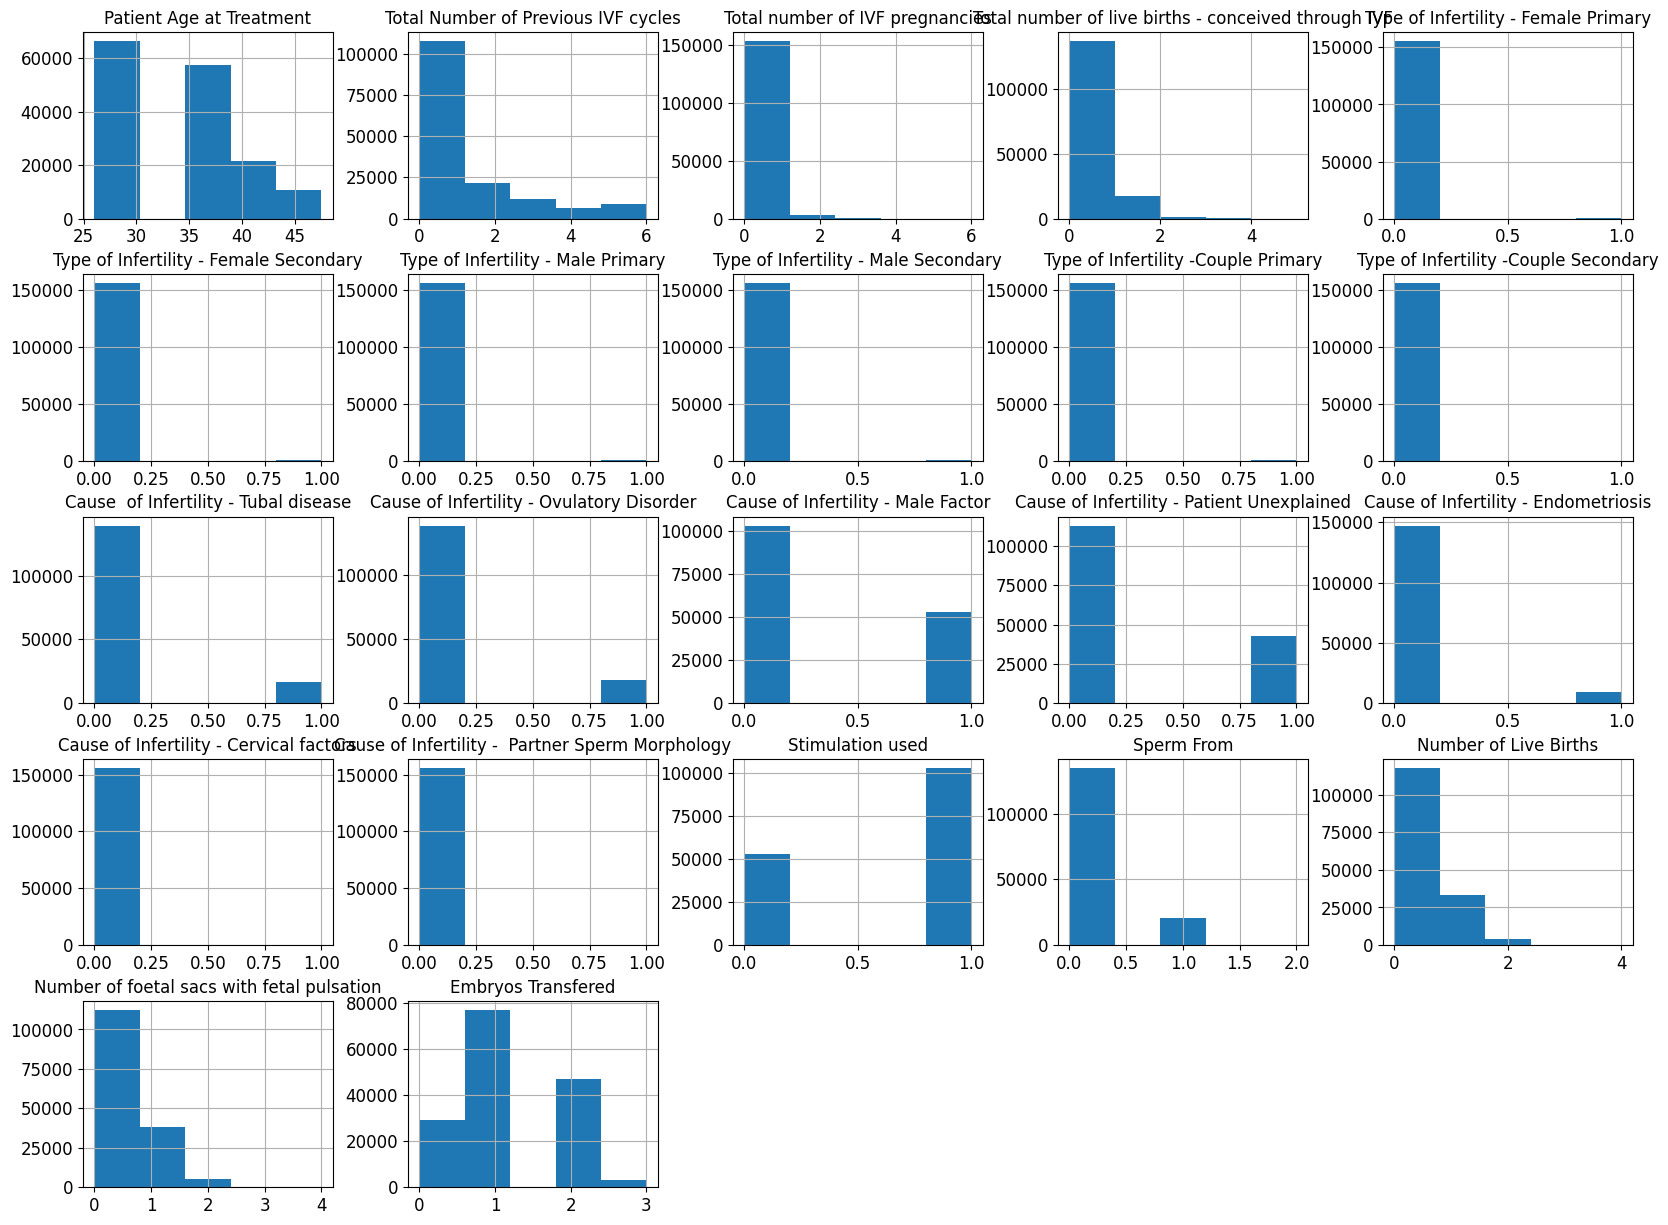

In [12]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mod_df.hist(bins=5, figsize=(20,15))
plt.show()

<AxesSubplot: >

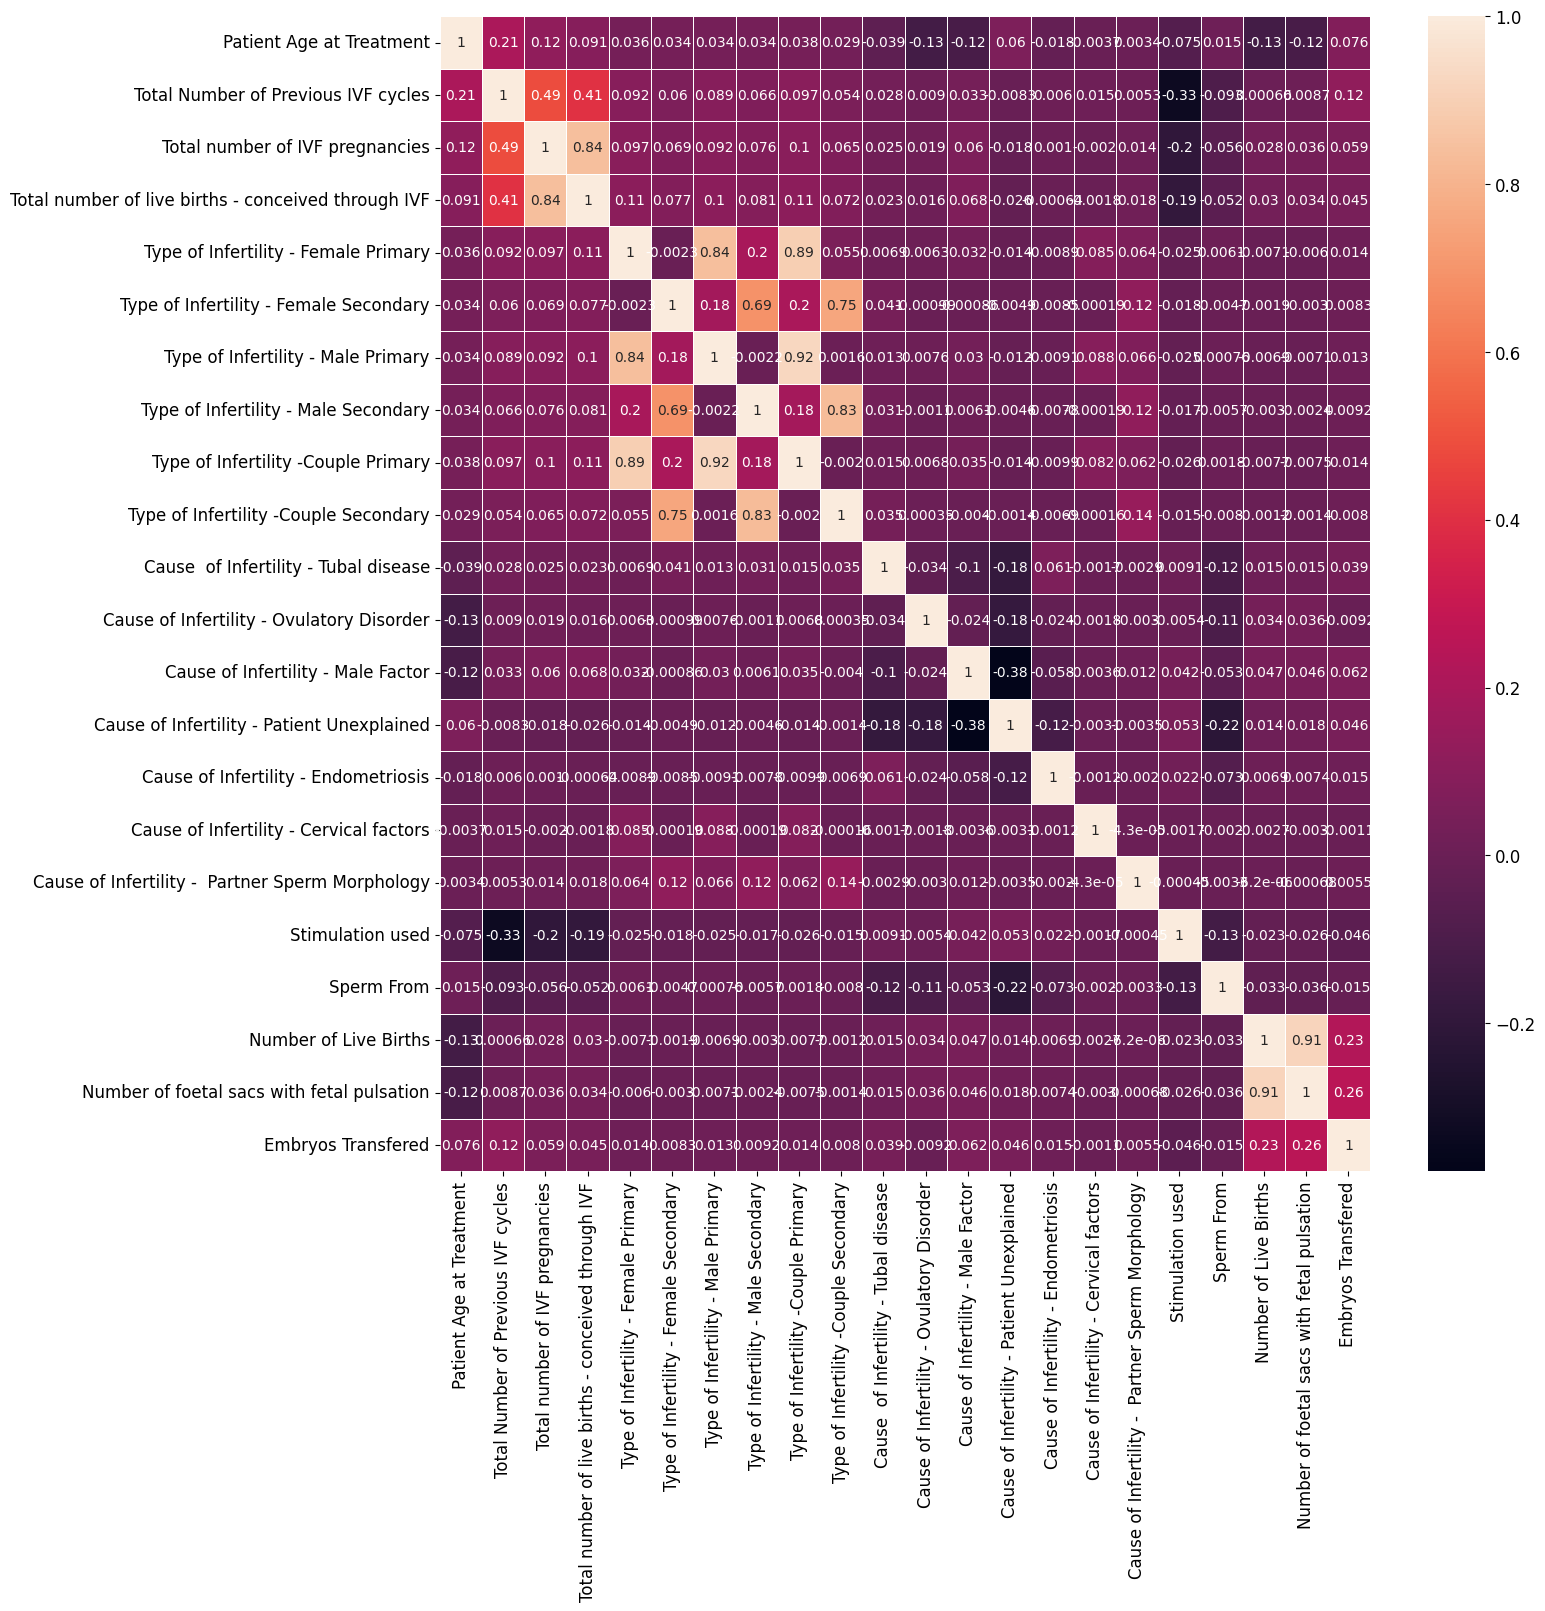

In [13]:
fig, ax = plt.subplots(figsize=(15,15))  # Sample figsize in inches
sns.heatmap(mod_df.corr(), annot=True, linewidths=.5, ax=ax)

In [14]:
# Splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = mod_df.drop('Total number of live births - conceived through IVF', axis=1), mod_df['Total number of live births - conceived through IVF']

train_set, test_set = train_test_split(mod_df, test_size=0.2, random_state=42)

# Scaling the training data
std_scaler = StandardScaler()
std_scaler.fit_transform(train_set)

# Separating target feature 'Total number of live births - conceived through IVF'
X_train, y_train = train_set.drop('Total number of live births - conceived through IVF', axis=1), train_set['Total number of live births - conceived through IVF']
X_test, y_test = test_set.drop('Total number of live births - conceived through IVF', axis=1), test_set['Total number of live births - conceived through IVF']

In [15]:
# Fine tuning hyperparameters for RandomForrestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 20, 50], 'max_features': [2, 3, 4]}]


forest_cl = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_cl, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_params_

C:\Users\dauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'max_features': 6, 'n_estimators': 30}

In [16]:
# Using estimated hyperparameters to train RandomForrestClassifier
# Getting Accuracy score

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

forest_cl.max_features = 6
forest_cl.n_estimators = 30

forest_cl.fit(X_train, y_train)

y_pred = forest_cl.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Clasification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[26488   979    23     0     0]
 [  310  3129    65     5     0]
 [   11   109    67     4     1]
 [    0     4     5     5     0]
 [    0     0     0     0     0]]
Clasification report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     27490
           1       0.74      0.89      0.81      3509
           2       0.42      0.35      0.38       192
           3       0.36      0.36      0.36        14
           4       0.00      0.00      0.00         0

    accuracy                           0.95     31205
   macro avg       0.50      0.51      0.50     31205
weighted avg       0.96      0.95      0.95     31205



C:\Users\dauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetri

In [17]:
# Fine tuning hyperparameters for RandomForrestClassifier

from sklearn.ensemble import ExtraTreesClassifier

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
    {'bootstrap': [False], 'n_estimators': [20, 50, 100, 200], 'max_features': [2, 3, 4]}]

extra_trees_cl = ExtraTreesClassifier(random_state=42)

grid_search = GridSearchCV(extra_trees_cl, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

grid_search.best_params_

C:\Users\dauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'bootstrap': False, 'max_features': 4, 'n_estimators': 100}

In [19]:
# Using estimated hyperparameters to train RandomForrestClassifier
# Getting Accuracy score

extra_trees_cl.bootstrap = False
extra_trees_cl.max_features = 4
extra_trees_cl.n_estimators = 100

extra_trees_cl.fit(X_train, y_train)

y_pred = extra_trees_cl.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Clasification report: \n', classification_report(y_test, y_pred))

Confusion matrix: 
 [[26523   946    21     0     0]
 [  410  3043    52     4     0]
 [   12   113    63     3     1]
 [    0     7     4     3     0]
 [    0     0     0     0     0]]
Clasification report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     27490
           1       0.74      0.87      0.80      3509
           2       0.45      0.33      0.38       192
           3       0.30      0.21      0.25        14
           4       0.00      0.00      0.00         0

    accuracy                           0.95     31205
   macro avg       0.49      0.47      0.48     31205
weighted avg       0.95      0.95      0.95     31205



C:\Users\dauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dauga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetri